<a href="https://colab.research.google.com/github/IgorDamascenoM/Repository_Machine_Learning/blob/main/ML_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import joblib 
import seaborn as sns
import sklearn as sk
from sklearn import metrics
from sklearn.linear_model import LogisticRegression # Modelo de regressão linear
from sklearn.preprocessing import MinMaxScaler # Para transformar os dados
from sklearn.model_selection import train_test_split # Para dividir o banco de dados
from sklearn.neighbors import KNeighborsClassifier # Modelo KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree Model
from sklearn.neural_network import MLPClassifier #MLP Model


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
%matplotlib inline

In [ ]:
type(classification_report)

function

In [ ]:
df_diabetes = pd.read_csv('dados_DM.csv', delimiter =',')


In [ ]:
df_diabetes.head(5)

,Pregnancies,Glicose,PS,EP,Insulina,IMC,PedigreeDiabetes,Idade,Diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.tail(5)

,Pregnancies,Glicose,PS,EP,Insulina,IMC,PedigreeDiabetes,Idade,Diabete
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df_diabetes.columns

Index(['Pregnancies', 'Glicose', 'PS', 'EP', 'Insulina', 'IMC',
       'PedigreeDiabetes', 'Idade', 'Diabete'],
      dtype='object')

In [ ]:
# Existe algum valor nulo nos meus dados ? (missed)
df_diabetes.isnull().values.any()

False

df_diabetes.info()

In [ ]:
df_diabetes.describe()

,Pregnancies,Glicose,PS,EP,Insulina,IMC,PedigreeDiabetes,Idade,Diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Quantidade de casos de Diabetes (Outcomes)
#variavel binária/dummy
#variavel que vai dizer se a pessoa tem ou não diabetes
df_diabetes['Diabete'].value_counts()

0    500
1    268
Name: Diabete, dtype: int64

In [ ]:
#análise de correlação ==> função corr
correlation = df_diabetes.corr()

<AxesSubplot:>

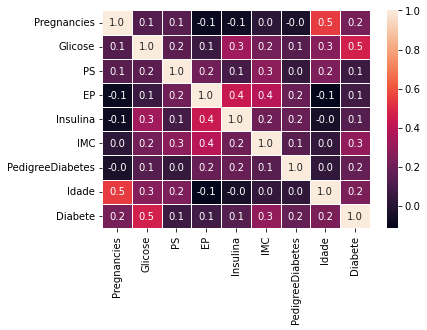

In [ ]:
#plot da matirz (Gráfico)
#gráfico da matriz de correlação (seaborn)
#Grau de correlação não implica uma relação causal
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.8)
plot

In [ ]:
df_diabetes.corr()

,Pregnancies,Glicose,PS,EP,Insulina,IMC,PedigreeDiabetes,Idade,Diabete
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
PS,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
EP,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
PedigreeDiabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabete,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Divindo a base de dados

1. Banco de treinos (70% +-)
2. Banco de testes  (30% +-)

In [ ]:
sk.__version__

'1.0.2'

In [ ]:
sns.__version__

'0.11.2'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_diabetes.columns

Index(['Pregnancies', 'Glicose', 'PS', 'EP', 'Insulina', 'IMC',
       'PedigreeDiabetes', 'Idade', 'Diabete'],
      dtype='object')

In [ ]:
atributos = ['Pregnancies', 'Glicose', 'PS', 'EP', 'Insulina', 'IMC',
       'PedigreeDiabetes', 'Idade']

In [ ]:
#variavel que sera prevista
atributo_prev= ['Diabete']

X = variavel preditora
Y = variavel dependente

In [ ]:
x = df_diabetes[atributos].values
y = df_diabetes[atributo_prev].values

In [ ]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
split_test_size = 0.3

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x,y, test_size = split_test_size, random_state = 42)

In [ ]:
print ("{0:0.2f}% nos dados de treino".format ((len(X_treino)/len(df_diabetes.index))*100))
print ("{0:0.2f}% nos dados de teste".format ((len(X_teste)/len(df_diabetes.index))*100))

69.92% nos dados de treino
30.08% nos dados de teste


In [ ]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

In [ ]:
print ("Original True : {0} ({1:0.2f}%)".format(len(df_diabetes.loc[df_diabetes['Diabete']==1]),
                                               (len(df_diabetes.loc[df_diabetes['Diabete']==1])/len(df_diabetes.index)*100)))

print ("Original False : {0} ({1:0.2f}%)".format(len(df_diabetes.loc[df_diabetes['Diabete']==0]),
                                               (len(df_diabetes.loc[df_diabetes['Diabete']==0])/len(df_diabetes.index)*100)))

print ("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:]==1]),
                                               (len(Y_treino[Y_treino[:]==1])/len(Y_treino)*100)))

print ("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:]==0]),
                                               (len(Y_treino[Y_treino[:]==0])/len(Y_treino)*100)))

print ("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:]==1]),
                                               ((len(Y_teste[Y_teste[:]==1]))/len(Y_teste)*100)))

print ("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:]==0]),
                                               (len(Y_teste[Y_teste[:]==0])/len(Y_teste)*100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)
Training True : 188 (35.01%)
Training False : 349 (64.99%)
Test True : 80 (34.63%)
Test False : 151 (65.37%)


In [ ]:
df_diabetes.head(1)

,Pregnancies,Glicose,PS,EP,Insulina,IMC,PedigreeDiabetes,Idade,Diabete
0,6,148,72,35,0,33.6,0.627,50,1


In [ ]:
print ("#Linhas no dataframe {0}".format(len(df_diabetes)))
print ("#Linhas missing de GLicose {0}".format(len(df_diabetes.loc[df_diabetes['Glicose'] == 0])))
print ("#Linhas missing de PS {0}".format(len(df_diabetes.loc[df_diabetes['EP'] == 0])))
print ("#Linhas missing de EP {0}".format(len(df_diabetes.loc[df_diabetes['PS'] == 0])))
print ("#Linhas missing de Insulina {0}".format(len(df_diabetes.loc[df_diabetes['Insulina'] == 0])))
print ("#Linhas missing de IMC {0}".format(len(df_diabetes.loc[df_diabetes['IMC'] == 0])))
print ("#Linhas missing de Idade {0}".format(len(df_diabetes.loc[df_diabetes['Idade'] == 0])))

#Linhas no dataframe 768
#Linhas missing de GLicose 5
#Linhas missing de PS 227
#Linhas missing de EP 35
#Linhas missing de Insulina 374
#Linhas missing de IMC 11
#Linhas missing de Idade 0


**TRATANDO DADOS MISsING**

In [ ]:
#Possibilidade 1 Seria  deletar as colunas com valores missing
#   df.drop(columns=['Insulina','IMC'])
## deletando as colunas imc e insulina

In [ ]:
#Possibilidade 2 Seria deletar as linhas com valores missing
df_diabetes.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,Pregnancies,Glicose,PS,EP,Insulina,IMC,PedigreeDiabetes,Idade,Diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
## Possibilidade 3 Imputação de dados, subustituir os valores pela media
from sklearn.impute import SimpleImputer

In [ ]:
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [ ]:
X_treino

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

**MODELO DE REGRESSÃO LOGISTICA**

MODELO PRA PREVER CATEGORIAS (CLASSIFICAÇÃO, POR EXEMPLO: DIABETES OU NÃO DIABETICOS {0 ou 1})

In [ ]:
modelo_rl = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_rl.fit(X_treino, Y_treino.ravel())
y_forecast_rl = modelo_rl.predict(X_teste)

**Acurácia**: é a media global do acerto do modelo ao classificar as classes

In [ ]:
print (f'Acurácia do modelo de regressão logística:{accuracy_score(Y_teste, y_forecast_rl)*100}')
print()
print ("Classification Report")
print (metrics.classification_report(Y_teste, y_forecast_rl, labels = [1,0]))

Acurácia do modelo de regressão logística:73.59307359307358

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



**KNN (K** **N**earest **N**eighbor)

In [ ]:
#Construindo um Modelo KNN com 5 neighbors
modelo_KNN = KNeighborsClassifier(n_neighbors=27)

#Treinando o Modelo KNN (RAVEL transforma um array de arrays em 1 só array)
modelo_KNN.fit(X_treino, Y_treino.ravel())

#Testando o Modelo KNN
y_forecast_KNN = modelo_KNN.predict(X_teste)

In [ ]:
print ("Exatidão do modelo KNN: {0:.2f}%".format(metrics.accuracy_score(Y_teste, y_forecast_KNN)*100))
print()
print ("Classification Report")
print (metrics.classification_report(Y_teste, y_forecast_KNN, labels = [1,0]))

Exatidão do modelo KNN: 71.43%

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.54      0.57        80
           0       0.77      0.81      0.79       151

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.71      0.71      0.71       231



**Decision Tree**

In [ ]:
modelo_tree = DecisionTreeClassifier(random_state=1)
modelo_tree.fit(X_treino, Y_treino)
y_forecast_tree = modelo_tree.predict(X_teste)

In [ ]:
print ("Exatidão do modelo de Árvore de decisão: {0:.2f}%".format(metrics.accuracy_score(Y_teste, y_forecast_tree)*100))
print()
print ("Classification Report")
print (metrics.classification_report(Y_teste, y_forecast_tree, labels = [1,0]))

Exatidão do modelo de Árvore de decisão: 73.16%

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.64      0.62        80
           0       0.80      0.78      0.79       151

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



**CLASSIFICADOR NAIVE BAYES**

Trabalha com probabilidade condicional
Desconsidera a correlação entre as variáveis

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo_NB = GaussianNB()

modelo_NB.fit(X_treino, Y_treino.ravel())

GaussianNB()

In [ ]:
from sklearn import metrics
y_forecast_NB = modelo_NB.predict(X_teste)

print ("Exatidão do modelo Navie Bayes: {0:.2f}%".format(metrics.accuracy_score(Y_teste, y_forecast_NB)*100))
print()
print ("Classification Report")
print (metrics.classification_report(Y_teste, y_forecast_NB, labels = [1,0]))

Exatidão do modelo Navie Bayes: 73.59%

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



**COMPARANDO A ACURÁCIA DOS MODELOS**

In [ ]:
print ("Exatidão do modelo regressão logística: {0:.2f}%".format(metrics.accuracy_score(Y_teste, y_forecast_rl)*100))
print ("Exatidão do modelo KNN: {0:.2f}%".format(metrics.accuracy_score(Y_teste, y_forecast_KNN)*100))
print ("Exatidão do modelo árvore de decisão: {0:.2f}%".format(metrics.accuracy_score(Y_teste, y_forecast_tree)*100))
print ("Exatidão do modelo Navie Bayes: {0:.2f}%".format(metrics.accuracy_score(Y_teste, y_forecast_NB)*100))

Exatidão do modelo regressão logística: 73.59%
Exatidão do modelo KNN: 71.43%
Exatidão do modelo árvore de decisão: 73.16%
Exatidão do modelo Navie Bayes: 73.59%


**Predição com o modelo de regressão logistica**

In [ ]:
df_diabetes.head(4)

,Pregnancies,Glicose,PS,EP,Insulina,IMC,PedigreeDiabetes,Idade,Diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
pregnancies = input('Número de filhos: ')
Glicose = input('Glicose: ')
PS = input('Pressão sanguínea: ')
EP = input('Espessura da pele: ')
Insulina = input('Insulina: ')
IMC = input(str('IMC: '))
PedigreeDiabetes = input(str('Pedigree para Diabetes: '))
Idade = input('Idade: ')

Número de filhos: 1
Glicose: 99
Pressão sanguínea: 90
Espessura da pele: 40
Insulina: 92
IMC: 35
Pedigree para Diabetes: 0.627
Idade: 60


In [ ]:
paciente = np.array([pregnancies,
                    Glicose,
                    PS,
                    EP,
                    Insulina,
                    IMC,
                    PedigreeDiabetes,
                    Idade]).reshape((1,-1))

In [ ]:
import warnings
warnings.filterwarnings("ignore")
print(f'O resultado do exame é: {modelo_rl.predict(paciente)[0]}')

O resultado do exame é: 0
